# Calculating Returns

Here we show how to calculate returns manually. Note that you can calculate the percentual changes, i.e. net return, using a Pandas function called `pct_change` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) which stands for percentage change between the current and a prior element.


## Return on Investment (ROI)

### Net return

$$R_{t} = \dfrac{P_{t} - P_{t-1}}{P_{t-1}} = \dfrac{P_{t}}{P_{t-1}} - 1$$

### Simple gross return

Ratio of the latest value with respect to the previous value:

$$1 + R_{t} = \dfrac{P_t}{P_{t-1}}$$

### Log return

Continuously compounded return:

$$r_t = log \left(1+R_t\right) = log \left(\dfrac{P_t}{P_{t-1}}\right) = log \left(P_t\right) - log\left(P_{t-1}\right)$$

Log price: $p_t = log \left(P_t\right)$

### Cumulative Returns

Given: $R_1, R_2, R_2,...,R_{252}, P_0$

Want: $P_{252}$

Formula: $P_t = P_{t-1} \left(1 + R_t \right)$

Answer: $P_{252} = P_{0} \left(1+R_{1}\right)\left(1+R_{2}\right)...\left(1+R_{252}\right)$

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download the S&P500 data from Kaggle
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")
df = pd.read_csv('./sandp500/all_stocks_5yr.csv', parse_dates=True)
df.head()

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
sbux = df[df['Name'] == 'SBUX']
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot: >

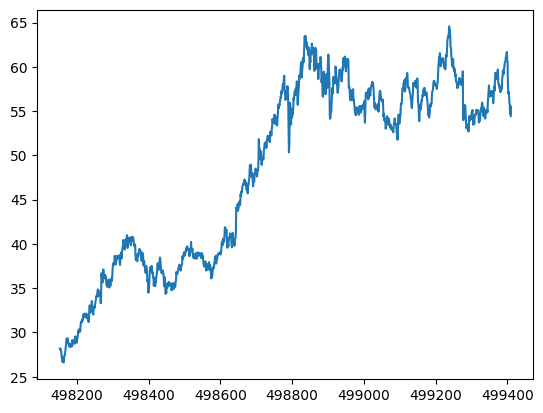

In [4]:
sbux['close'].plot()

In [5]:
sbux.insert(len(sbux.columns), 'prev close', sbux['close'].shift(1))
sbux.insert(len(sbux.columns), 'return', sbux['close'] / sbux['prev close'] - 1.0)
sbux.head()

,date,open,high,low,close,volume,Name,prev close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [6]:
# Pandas has a ready made function for calculating percentual changes directly
sbux.insert(len(sbux.columns), 'return 2', sbux['close'].pct_change(1))
sbux.head()

,date,open,high,low,close,volume,Name,prev close,return,return 2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


(0.0006002332205830914, 0.012360934026133879)

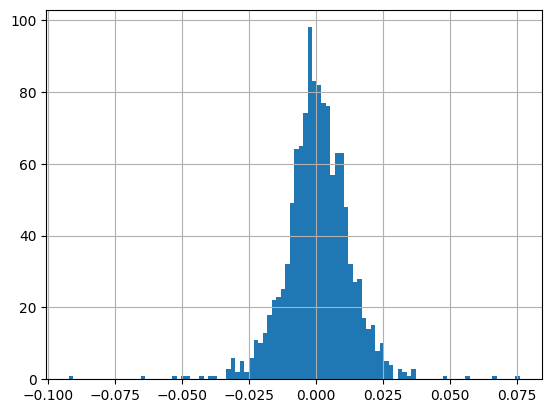

In [7]:
# Visualize distribution of the returns
sbux['return'].hist(bins=100)

# Print mean and standard deviation
sbux['return'].mean(), sbux['return'].std()

In [8]:
# Log return
sbux.insert(len(sbux.columns), 'log return', np.log(sbux['return'] + 1.0))
sbux.head()

,date,open,high,low,close,volume,Name,prev close,return,return 2,log return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


(0.0005235902748108682, 0.012381234216101258)

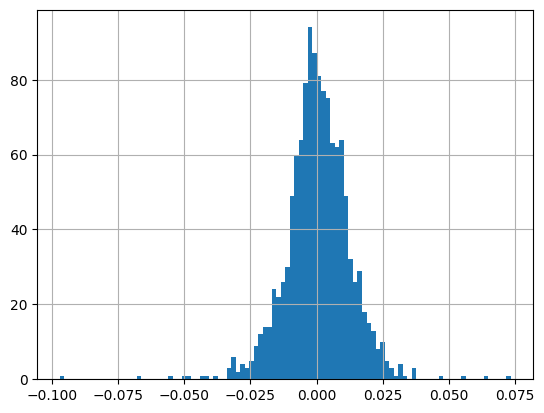

In [9]:
sbux['log return'].hist(bins=100)
sbux['log return'].mean(), sbux['log return'].std()